<a href="https://colab.research.google.com/github/zrsteff/CSC587-Work/blob/main/DecisionTreeKNN_4_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# import main libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:

# reading the data .csv file
data = pd.read_csv('/content/drive/MyDrive/DATA/breast-cancer.csv')

# Read data as DataFrame
data = pd.DataFrame(data)
print(data.shape)
# Show the first 5 rows of DF
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# check nulls
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


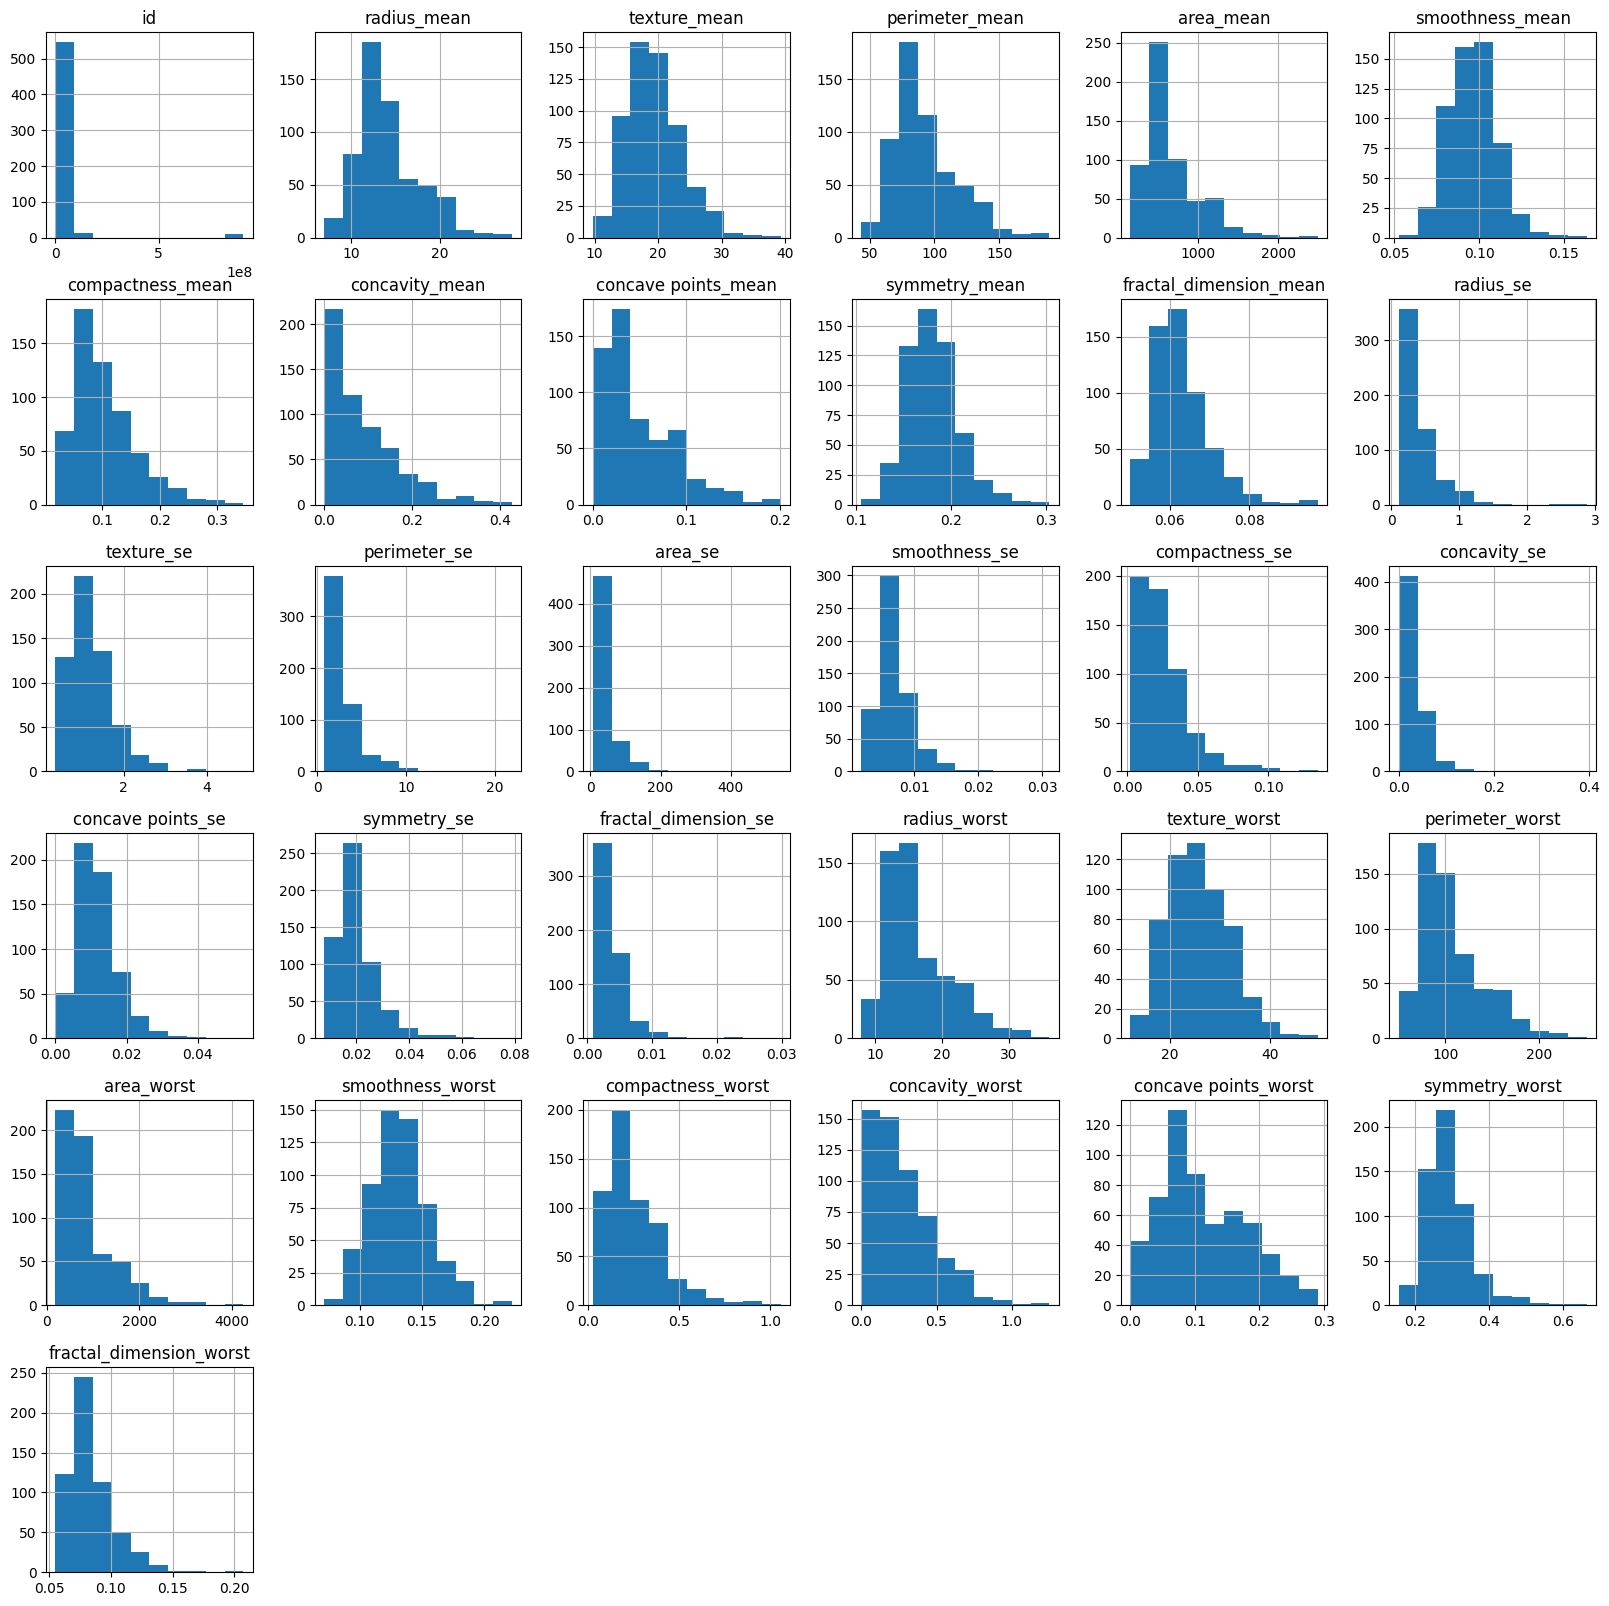

In [34]:
# Check the distribution for each column by using histogram
data.hist(figsize=(20, 20))
plt.show()

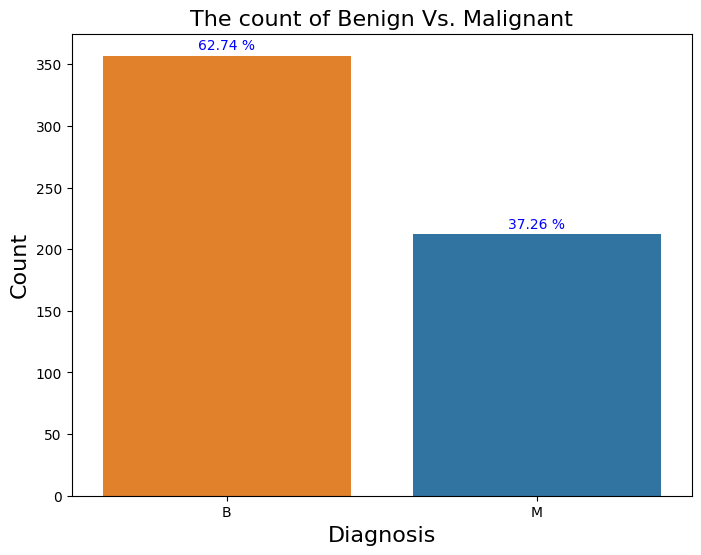

In [35]:
# plot the percentage of target column values
replicates = data['diagnosis'].value_counts()

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, order=replicates.index, hue='diagnosis')
plt.title('The count of Benign Vs. Malignant', fontsize=16, c='k')
plt.xlabel('Diagnosis', fontsize=16, c='k')
plt.ylabel('Count', fontsize=16, c='k')

#this part is just for labeling the bars
for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(data):.2f} %'
    plt.text(x=i, y=each_count+5, s=each_text,ha='center', c='b')

plt.show()

#sns.countplot(data=data, x='diagnosis', hue='diagnosis')

In [36]:
# identify features and drop other useless columns (Feature Extraction)
X = data.drop(columns=['diagnosis', 'id'], axis=1)
y = data['diagnosis']

In [37]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Try Decision Tree**

In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier() #create the clf object with options you wanna work with
clf = clf.fit(X_train, y_train) #first paramater data, second labels
y_pred = clf.predict(X_train) #predicting
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() #compare with the ground truth
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} Training accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')


TN: 286 FP: 0 FN: 0 TP: 169 Training accuracy: 1.00


**Test it**

In [39]:
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} test accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 68 FP: 3 FN: 4 TP: 39 test accuracy: 0.94


**Can you do the KNN version of the experiment above?**

In [40]:
#import your KNeighborsClassifier from sklearn.neighbors.
#Set your number of neighbors with n_neighbor parameter.
#fit your model and report your training accuracy along with your TN, FN, TP, FP values

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = data.drop(columns=['diagnosis', 'id'], axis=1)
y = data['diagnosis']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print(f"TRAIN tn, fp, fn, tp = {tn}, {fp}, {fn}, {tp} Training accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}")

TRAIN tn, fp, fn, tp = 286, 0, 9, 160 Training accuracy: 0.98


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

feat_names = ["train", "X_train", "x_train"]
label_names = ["train_labels", "y_train", "y_train_labels"]
test_feat_names = ["X_test", "x_test", "test"]
test_label_names = ["y_test", "test_labels"]

def pick_first_existing(names, env=globals()):
    for n in names:
        if n in env:
            return env[n], n
    return None, None

X_train, X_train_name = pick_first_existing(feat_names)
y_train, y_train_name = pick_first_existing(label_names)
X_test, X_test_name = pick_first_existing(test_feat_names)
y_test, y_test_name = pick_first_existing(test_label_names)

if X_train is None or y_train is None:
    raise NameError("Could not find training data and labels. Expected variables named one of: "
                    f"{feat_names} and {label_names}. Found: {X_train_name}, {y_train_name}")

have_test = X_test is not None and y_test is not None

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) if X_test is not None else None

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
acc_train = accuracy_score(y_train, y_train_pred)
print(f"Using k={k} | TRAIN on {X_train_name} vs {y_train_name} : Accuracy = {acc_train:.4f}")
cm_train = confusion_matrix(y_train, y_train_pred)
print("Training confusion matrix:\n", cm_train)
print("Training classification report:\n", classification_report(y_train, y_train_pred, zero_division=0))


ks = [1,3,5,7,9]
scores = []
for kk in ks:
    m = KNeighborsClassifier(n_neighbors=kk)
    m.fit(X_train_scaled, y_train)
    scores.append(accuracy_score(y_train, m.predict(X_train_scaled)))
print(f"\nQuick train accuracies for ks {ks} : {scores}")

Using k=5 | TRAIN on X_train vs y_train : Accuracy = 0.9802
Training confusion matrix:
 [[286   0]
 [  9 160]]
Training classification report:
               precision    recall  f1-score   support

           B       0.97      1.00      0.98       286
           M       1.00      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455


Quick train accuracies for ks [1, 3, 5, 7, 9] : [1.0, 0.9846153846153847, 0.9802197802197802, 0.9692307692307692, 0.978021978021978]


**Below is just informational purpose. You may want to do some reading for xgboost which proved itself as a high performing classifier.**

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import xgboost as xgb

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=94)

# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
clf.predict(X_test)


[0]	validation_0-logloss:0.45956
[1]	validation_0-logloss:0.34154
[2]	validation_0-logloss:0.26965
[3]	validation_0-logloss:0.22240
[4]	validation_0-logloss:0.19072
[5]	validation_0-logloss:0.17004
[6]	validation_0-logloss:0.15313
[7]	validation_0-logloss:0.13904
[8]	validation_0-logloss:0.12969
[9]	validation_0-logloss:0.12170
[10]	validation_0-logloss:0.11581
[11]	validation_0-logloss:0.11132
[12]	validation_0-logloss:0.10842
[13]	validation_0-logloss:0.10193
[14]	validation_0-logloss:0.09952
[15]	validation_0-logloss:0.09688
[16]	validation_0-logloss:0.09639
[17]	validation_0-logloss:0.09159
[18]	validation_0-logloss:0.09210
[19]	validation_0-logloss:0.09067
[20]	validation_0-logloss:0.08809
[21]	validation_0-logloss:0.08803
[22]	validation_0-logloss:0.08720
[23]	validation_0-logloss:0.08641
[24]	validation_0-logloss:0.08739


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [43]:
clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
print(f'TN: {tn} FP: {fp} FN: {fn} TP: {tp} test accuracy: {(tp+tn)/(tp+tn+fp+fn):.2f}')

TN: 50 FP: 3 FN: 1 TP: 89 test accuracy: 0.97
